In [ ]:
Finding Outliers

Objectives:

Analyze the distribution of key variables in the dataset.

Identify and remove outliers using statistical methods.

Perform relevant statistical and correlation analysis.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
Step 2: Plot the Distribution of Industry
Explore how respondents are distributed across different industries.

Plot a bar chart to visualize the distribution of respondents by industry.

Highlight any notable trends.

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


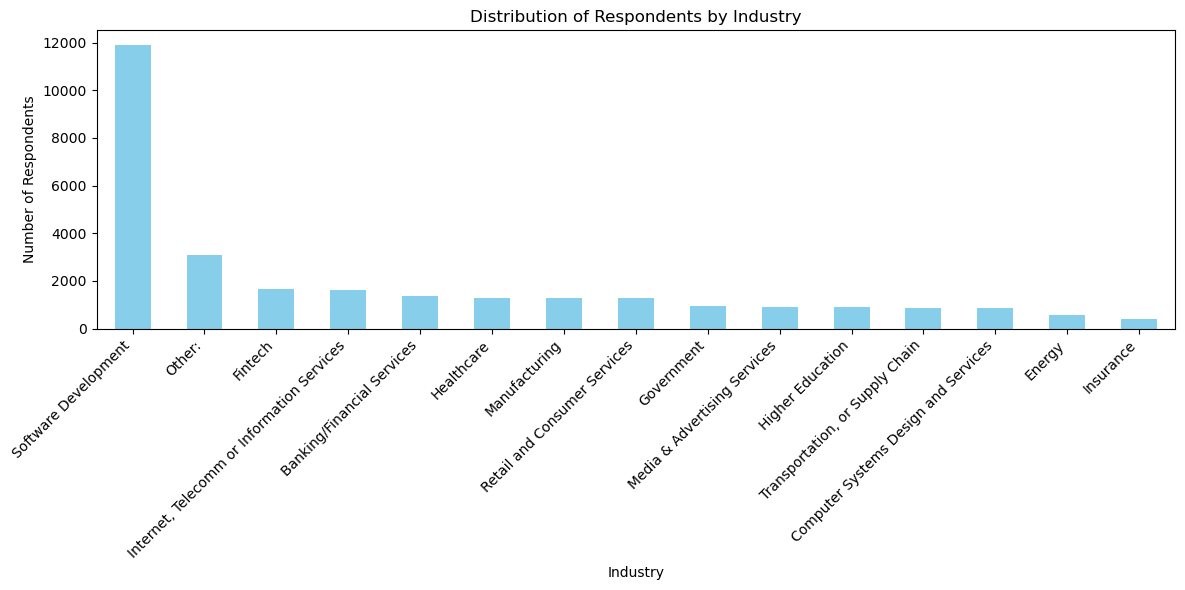

In [3]:
# Create the dataframe
df = pd.read_csv(file_url)

# Check the column names to identify the industry column
print(df.columns)

# Assuming the column with industries is named 'Industry' or similar
# If not, replace 'Industry' below with the correct column name
industry_counts = df['Industry'].value_counts()

# Plot the distribution
plt.figure(figsize=(12,6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Step 3: Identify High Compensation Outliers
Identify respondents with extremely high yearly compensation.

Calculate basic statistics (mean, median, and standard deviation) for ConvertedCompYearly.

Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).

In [4]:
# Calculate basic statistics for yearly compensation
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

# Define threshold for high compensation (mean + 3 * std deviation)
threshold = mean_comp + 3 * std_comp
print(f"High Compensation Threshold: {threshold:.2f}")

# Identify outliers exceeding the threshold
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"Number of high compensation outliers: {high_comp_outliers.shape[0]}")

# Optionally, display the outliers
print(high_comp_outliers[['ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False))


Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97
High Compensation Threshold: 646426.21
Number of high compensation outliers: 89
       ConvertedCompYearly
15837           16256603.0
12723           13818022.0
28379            9000000.0
17593            6340564.0
17672            4936778.0
...                    ...
13336             660660.0
28381             650000.0
28213             650000.0
6735              650000.0
529               650000.0

[89 rows x 1 columns]


In [ ]:
Step 4: Detect Outliers in Compensation
Identify outliers in the ConvertedCompYearly column using the IQR method.

Calculate the Interquartile Range (IQR).

Determine the upper and lower bounds for outliers.

Count and visualize outliers using a box plot.

Q1: 32712.00
Q3: 107971.50
IQR: 75259.50
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of outliers: 978


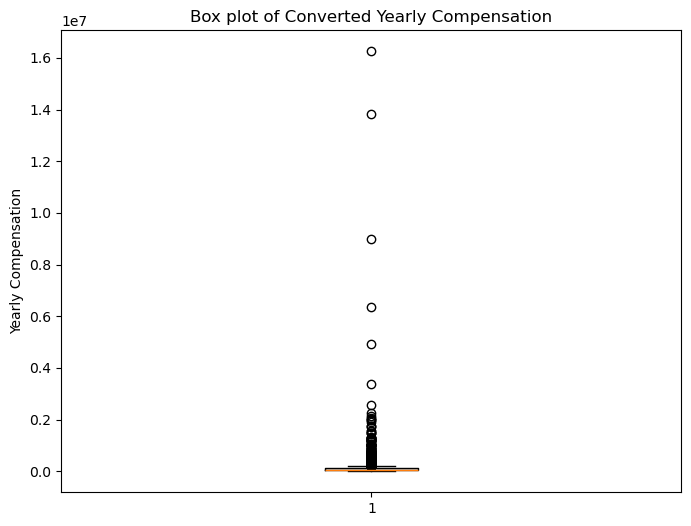

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")

# Visualize with a box plot
plt.figure(figsize=(8,6))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=True)
plt.title('Box plot of Converted Yearly Compensation')
plt.ylabel('Yearly Compensation')
plt.show()


In [ ]:
Step 5: Remove Outliers and Create a New DataFrame¶

Remove outliers from the dataset.

Create a new DataFrame excluding rows with outliers in ConvertedCompYearly.
Validate the size of the new DataFrame.

In [6]:
# Using the bounds from the previous step:
# lower_bound and upper_bound

# Filter the dataframe to exclude outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape[0]}")
print(f"DataFrame size after removing outliers: {df_no_outliers.shape[0]}")

# Optionally, check that no outliers remain
outliers_after_removal = df_no_outliers[(df_no_outliers['ConvertedCompYearly'] < lower_bound) | 
                                       (df_no_outliers['ConvertedCompYearly'] > upper_bound)]
print(f"Outliers remaining after removal: {outliers_after_removal.shape[0]}")


Original DataFrame size: 65437
DataFrame size after removing outliers: 22457
Outliers remaining after removal: 0


In [ ]:
Step 6: Correlation Analysis
Analyze the correlation between Age (transformed) and other numerical columns.

Map the Age column to approximate numeric values.

Compute correlations between Age and other numeric variables.

Visualize the correlation matrix.

In [9]:
# Display unique values in the Age column
print(df['Age'].unique())


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [10]:
import numpy as np

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': (18+24)/2,
    '25-34 years old': (25+34)/2,
    '35-44 years old': (35+44)/2,
    '45-54 years old': (45+54)/2,
    '55-64 years old': (55+64)/2,
    '65 years or older': 65,
    'Prefer not to say': np.nan  # mark as NaN for missing/unknown
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

print(df[['Age', 'AgeNumeric']].head())



                  Age  AgeNumeric
0  Under 18 years old        17.0
1     35-44 years old        39.5
2     45-54 years old        49.5
3     18-24 years old        21.0
4     18-24 years old        21.0
